In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
def read_all_outputs(prefix, planet, maxi):
    outputs = []
    for i in range(1,maxi+1):
        file_name = prefix + planet + str(i) + '.csv'
        try:
            output = pd.read_csv(file_name, index_col = 'time')
            outputs.append(output)
        except:
            print('no file named ' + file_name)
    return outputs
        
    

In [3]:
#transform gamma range from -pi to pi, to 0 to 2pi
def gamma_transform(gamma):
    if gamma < 0:
        return gamma + 2 * np.pi
    else:
        return gamma
    


In [5]:
def plot_subplots(data, feature, Nrows, Ncols):
    """
    Plots subplots for a given feature for an array of different data
    
    data: array of pandas DataFrames containing the data
    feature: string which indicates which feature we're plotting from each DataFrame
    Nrows: number of rows
    Ncols: number of columns
    
    
    """

    fig, axes = plt.subplots(nrows = Nrows, ncols = Ncols, figsize = (18,10), sharey = True, sharex = False)

    for i in range(len(data)):
        row = int(i/Ncols)
        col = i % Ncols
        sns.lineplot(data = data[i][feature].iloc[-10000:], ax = axes[row,col])

    plt.show()

In [4]:
outputs = read_all_outputs('output_', 'f', 19)

no file named output_f1.csv
no file named output_f9.csv


In [6]:
for i in range(len(outputs)):
    std_gamma = outputs[i].iloc[20000:].describe().loc['std']['gamma']
    if(std_gamma > np.pi / 1.5):
        outputs[i].gamma = outputs[i].gamma.map(gamma_transform)
    print(outputs[i].iloc[20000:].describe().loc['std']['gamma'])

0.13385465476951092
0.12675647265652917
0.1369991345884851
0.14434983934010295
0.13574419896119633
0.12281967582732106
0.13653155035261424
0.130556901871472
0.14136184885340367
0.13068978734865383
0.14025331810729838
0.13007799657654745
0.13474764537218184
0.1405538798871297
0.1408286072867354
1.3165083428471527
0.16440977061676554


In [7]:
output = outputs[len(outputs)-2]

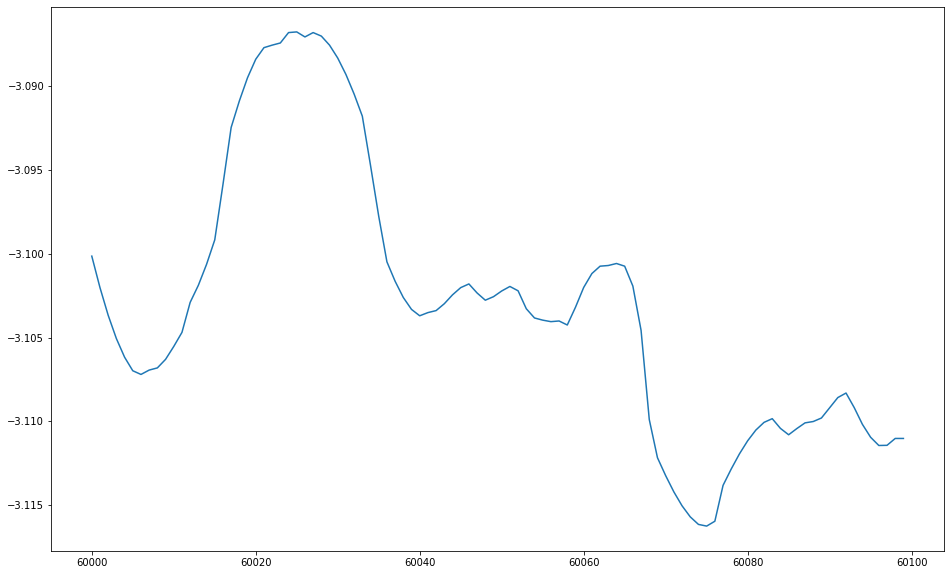

In [8]:
%matplotlib inline

plt.figure(figsize=(16,10))
sns.lineplot(data = output.iloc[60000:60100].gamma)
plt.show()

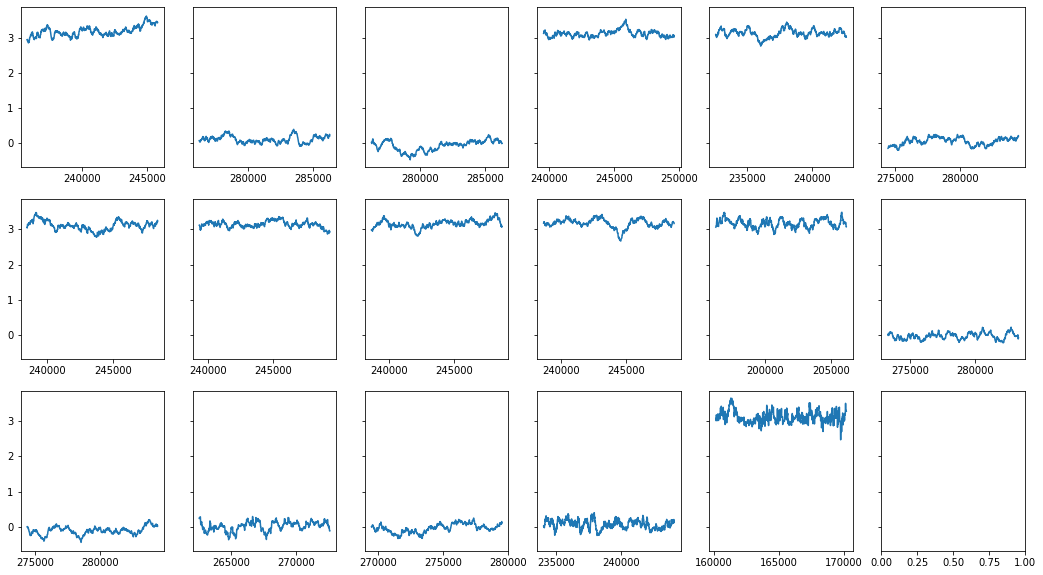

In [9]:
plot_subplots(outputs, feature = 'gamma', Nrows = 3, Ncols = 6)